In [1]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [2]:
# Setup configs for reward and policy learning

reward_cfg = {
    'n_sample': 100,
    'n_epoch': 20,
    'lr': 0.005,
    'verbose': False,
    'eval_freq': 100,
    'batch_size': 64,
    'split': 0.8,
    'log': False
}

policy_cfg = {
    'timesteps': 10000,
    'verbose': False,
    'algo': 'ppo', # not used atm
    'log': False
}

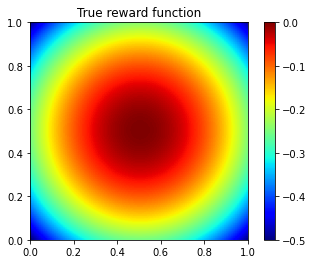

In [3]:
## Feedback loop

iterations = 10
samples = {}
reward_fns = {}

# Create comparison function
f = lambda x: -(x[0]-0.5)**2
g = lambda x: -(x[1]-0.5)**2
sigma_f, sigma_g = 0.0, 0.0
reward_fn_true = create_reward_fn(f, g, sigma_f, sigma_g)
comparison_fn = create_comparison_fn(f, g, sigma_f, sigma_g)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(0, 1, size=(2,)) for _ in range(n)])

# Plot true reward function
visualize_fn(reward_fn_true, title="True reward function")

Iteration 0
Learning with Cross Entropy
Learning with PPO


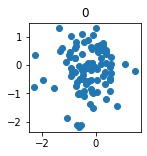

[-0.3162874  -0.15530135] [0.64417964 0.74118906]


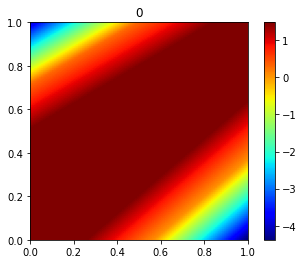

Iteration 1
Learning with Cross Entropy


/Users/anandsranjan/miniconda3/envs/games_env/lib/python3.9/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment FeedbackEnv-v0
  logger.warn("Overriding environment {}".format(id))


Learning with PPO


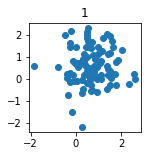

[0.65837646 0.6346589 ] [0.7324823  0.82157534]


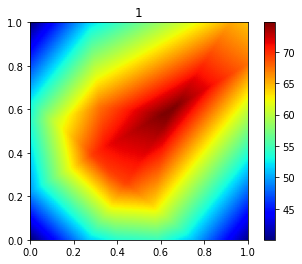

Iteration 2
Learning with Cross Entropy
Learning with PPO


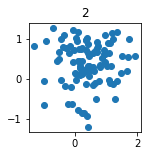

[0.41526142 0.39122367] [0.6369932 0.5340136]


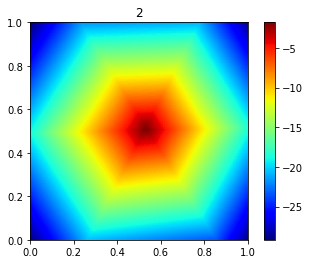

Iteration 3
Learning with Cross Entropy
Learning with PPO


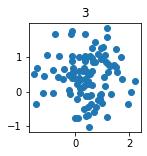

[0.4214544  0.44011325] [0.7551565  0.62853146]


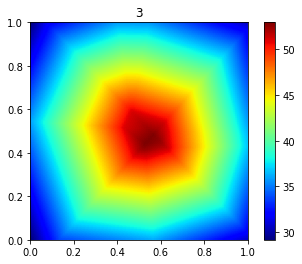

Iteration 4
Learning with Cross Entropy
Learning with PPO


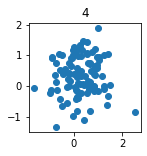

[0.28411514 0.34658912] [0.6672866  0.63690263]


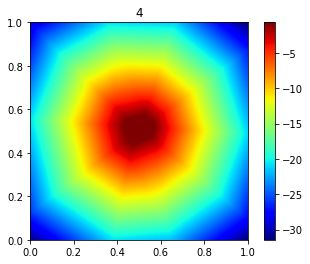

Iteration 5
Learning with Cross Entropy
Learning with PPO


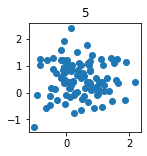

[0.43258408 0.50803626] [0.66127247 0.6351679 ]


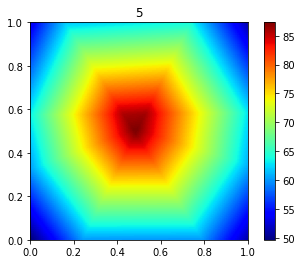

Iteration 6
Learning with Cross Entropy
Learning with PPO


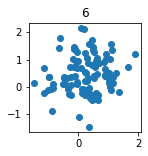

[0.24623598 0.45295933] [0.65372986 0.6804851 ]


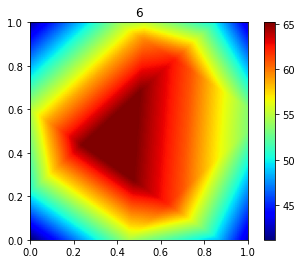

Iteration 7
Learning with Cross Entropy
Learning with PPO


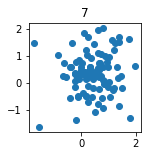

[0.40824318 0.35571468] [0.6530626 0.7371149]


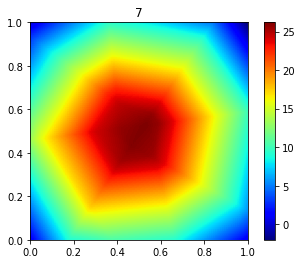

Iteration 8
Learning with Cross Entropy
Learning with PPO


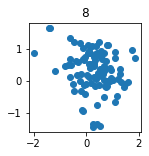

[0.3139734  0.33349553] [0.6724261  0.63001233]


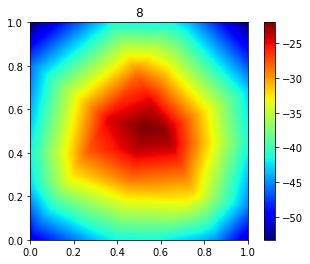

Iteration 9
Learning with Cross Entropy
Learning with PPO


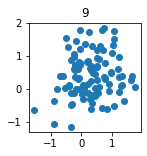

[0.30444014 0.429752  ] [0.6253224 0.6485703]


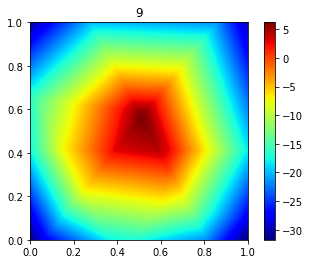

In [4]:
for i in range(iterations):
    print("Iteration", i)
    # Learn reward function from samples and feedback from comparison function
    reward_fn = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg)
    
    # Train policy on reward function and return sampler
    sample = train_policy(reward_fn, policy_cfg=policy_cfg)

    # Store sampler and reward function
    samples[i] = sample
    reward_fns[i] = reward_fn

    plot_sampler(samples[i], title=str(i))
    visualize_fn(reward_fns[i], title=str(i))